# NLP - Code

## What you will learn in this course 🧐🧐

You can perform NLP with a lot of different libraries. Among them are <a href="https://scikit-learn.org/stable/" target="_blank">sklearn</a>, <a href="https://spacy.io/" target="_blank">spaCy</a> and <a href="https://www.nltk.org/" target="_blank">NLTK</a>. In this course we will focus on `sklearn` and `spacy`. You will learn:

* How to create `doc` object with `spacy`
* How to get tokenize `doc` object with `spacy`
* How to stem, lemmatize words using `spacy`
* Create TF-IDF using `sklearn`

## NLP With Spacy 🚀🚀

If you are doing NLP, you will need to use a library that will allow you to manage your different preprocessing needs. `Spacy` is an extremely powerful library for this task.

To give you some context, this library has been designed to create an end-to-end NLP tool i.e. from data preprocessing to the deployment of an algorithm.

For our needs, we will look at how the library works on the preprocessing part.

In [1]:
# Install spacy
## -q is for "quiet". It removes logs
!pip install spacy -q

In [2]:
# Import spacy, if you don't have it --> !pip install spacy
import spacy
spacy.__version__

'3.8.4'

## Import a Language 🗺️🗺️

First of all, to get started in `spacy`, you will need to import a language. Indeed each language has its own specificities. In fact, you won't be able to have universal preprocessing templates.

Let's import English specificities. To do so, you will need to first download a `model` which holds everything you need to apply on your preprocessing.

In [3]:
# Download model
!python -m spacy download en_core_web_sm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 90.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Now you can simply load your model by importing it.   

In [5]:
# Import English using en_core_web_sm.load()
import en_core_web_sm
nlp = en_core_web_sm.load()

With `spacy`, you have many languages that you can load. Here they are (extracted from <a href="https://spacy.io/usage/models" target="_blank">`spacy`'s documentation</a>):

|Language|Code|Language Data|Models|
|--- |--- |--- |--- |
|Chinese|zh|lang/zh|3 models|
|Danish|da|lang/da|3 models|
|Dutch|nl|lang/nl|3 models|
|English|en|lang/en|3 models|
|French|fr|lang/fr|3 models|
|German|de|lang/de|3 models|
|Greek|el|lang/el|3 models|
|Italian|it|lang/it|3 models|
|Japanese|ja|lang/ja|3 models|
|Lithuanian|lt|lang/lt|3 models|
|Multi-language|xx|lang/xx|1 model|
|Norwegian Bokmål|nb|lang/nb|3 models|
|Polish|pl|lang/pl|3 models|
|Portuguese|pt|lang/pt|3 models|
|Romanian|ro|lang/ro|3 models|
|Spanish|es|lang/es|3 models|
|Afrikaans|af|lang/af|none yet|
|Albanian|sq|lang/sq|none yet|
|Arabic|ar|lang/ar|none yet|
|Armenian|hy|lang/hy|none yet|
|Basque|eu|lang/eu|none yet|
|Bengali|bn|lang/bn|none yet|
|Bulgarian|bg|lang/bg|none yet|
|Catalan|ca|lang/ca|none yet|
|Croatian|hr|lang/hr|none yet|
|Czech|cs|lang/cs|none yet|
|Estonian|et|lang/et|none yet|
|Finnish|fi|lang/fi|none yet|
|Gujarati|gu|lang/gu|none yet|
|Hebrew|he|lang/he|none yet|
|Hindi|hi|lang/hi|none yet|
|Hungarian|hu|lang/hu|none yet|
|Icelandic|is|lang/is|none yet|
|Indonesian|id|lang/id|none yet|
|Irish|ga|lang/ga|none yet|
|Kannada|kn|lang/kn|none yet|
|Korean|ko|lang/ko|none yet|
|Latvian|lv|lang/lv|none yet|
|Ligurian|lij|lang/lij|none yet|
|Luxembourgish|lb|lang/lb|none yet|
|Macedonian|mk|lang/mk|none yet|
|Malayalam|ml|lang/ml|none yet|
|Marathi|mr|lang/mr|none yet|
|Nepali|ne|lang/ne|none yet|
|Persian|fa|lang/fa|none yet|
|Russian|ru|lang/ru|none yet|
|Serbian|sr|lang/sr|none yet|
|Sinhala|si|lang/si|none yet|
|Slovak|sk|lang/sk|none yet|
|Slovenian|sl|lang/sl|none yet|
|Swedish|sv|lang/sv|none yet|
|Tagalog|tl|lang/tl|none yet|
|Tamil|ta|lang/ta|none yet|
|Tatar|tt|lang/tt|none yet|
|Telugu|te|lang/te|none yet|
|Thai|th|lang/th|none yet|
|Turkish|tr|lang/tr|none yet|
|Ukrainian|uk|lang/uk|none yet|
|Urdu|ur|lang/ur|none yet|
|Vietnamese|vi|lang/vi|none yet|
|Yoruba|yo|lang/yo|none yet|

All you will have to do is to do `python -m spacy da_core_web_sm` if you want to import danish model.

## Create a Doc object 📄📄

Once you have imported your language, you can create a `doc` object. This doc is your complete body of text. Once you have instantiated your doc, you will be able to use the full power of `spacy`.

In [6]:
doc = nlp("Hello World! Don't do this. I am superman wherever you are in the world")

In [7]:
doc

Hello World! Don't do this. I am superman wherever you are in the world

In [8]:
# Print tokens
print("Tokens: {}".format([token.text for token in doc]))
print("------------")

# Print Lemmatized tokens
print("Lemma: {}".format([token.lemma_ for token in doc]))
print("------------")

Tokens: ['Hello', 'World', '!', 'Do', "n't", 'do', 'this', '.', 'I', 'am', 'superman', 'wherever', 'you', 'are', 'in', 'the', 'world']
------------
Lemma: ['hello', 'World', '!', 'do', 'not', 'do', 'this', '.', 'I', 'be', 'superman', 'wherever', 'you', 'be', 'in', 'the', 'world']
------------


As you can see above, once we created our `doc`, we were able to extract:

* Tokens
* Lemmatized tokens
* Indices of each token
* Booleans that determine whether tokens are words or punctuation (alpha_numeric)
* Booleans that determine if the tokens are numbers

Powerful, isn't it? 💪

## Stop Words ⛔⛔

In NLP, stop words are all the linking words, articles and quantifiers that are widely used in a language but which are not in themselves meaningful.

For each language, you have a list of stop words made by spacy.

In [9]:
# Import english stop words
from spacy.lang.en.stop_words import STOP_WORDS

# Print stop words
print(STOP_WORDS)

{'seem', 'something', 'keep', 'part', 'yet', '’s', 'n‘t', 'do', 'had', 'three', 'two', 're', 'across', 'say', 'well', 'who', 'few', 'one', 'nor', 'is', 'it', 'whose', 'been', 'therein', 'less', 'alone', 'back', 'more', 'serious', 'yours', 'namely', 'otherwise', 'seems', 'whether', 'your', "'m", 'at', 'how', 'get', 'which', 'myself', 'becoming', 'does', 'into', 'whole', 'you', 'when', 'became', 'might', 'anyone', 'i', 'thus', 'five', 'us', "'re", 'may', 'nothing', 'any', 'using', '’ve', 'anything', 'someone', 'not', 'nowhere', 'six', 'everywhere', "'ve", 'see', 'thereupon', 'else', 'indeed', 'twenty', 'ourselves', 'or', 'doing', 'here', 'now', 'side', "'ll", 'however', 'will', 'under', 'done', 'seeming', 'former', 'along', 'those', 'each', 'that', 'above', 'sixty', 'meanwhile', 'should', 'through', 'such', 'from', 'hereupon', 'another', 'her', 'seemed', 'various', 'mine', 'put', 'formerly', 'yourselves', 'again', 'even', '’ll', 'wherein', 'whereas', 'latterly', 'must', 'four', 'among', 

## WordCloud ☁️☁️

One visualization that we do a lot when doing NLP is to create a word cloud. Although it is not directly a `spacy` method, we thought it was important to show you how to create it via `wordcloud` and `matplotlib`.

In [10]:
# Install wordcloud if necessary
!pip install wordcloud -q

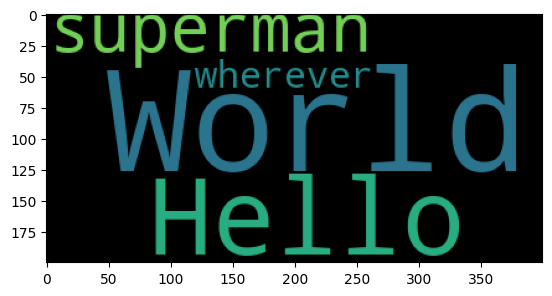

In [11]:
# Import matplotlib and wordcloud
import matplotlib.pyplot as plt
import wordcloud

# Instanciate WordCloud
wd = wordcloud.WordCloud()
cloud = wd.generate(doc.text)

# Show word cloud with matplotlib
plt.imshow(cloud)

# Remove trailing logs
plt.show()

Making a word cloud with stop words can hide important words in a body of text, so here's how you can remove them.

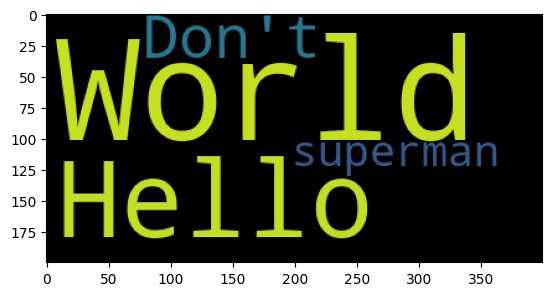

In [12]:
# Instanciate WordCloud with no stop words
wd = wordcloud.WordCloud(stopwords=STOP_WORDS)

# Generate word cloud
cloud = wd.generate(doc.text)

# Show with matplotlib
plt.imshow(cloud)

# Remove trailing log
plt.show()

## Visualize 🎨🎨

Finally, an interesting feature of spacy is `displacy` which allows you to see all the relationships between words in a corpus of text. Here's how you can use this visualization.

In [ ]:
# import displacy
from spacy import displacy

# render displacy
displacy.render(doc, style='dep', jupyter=True,options={'distance': 70})

## Text Mining with `sklearn` ⛏️⛏️

Now that we have tokens and we can easily manipulate our corpus of text, let's now sklearn for advanced text mining technics like `tf-idf`.

In terms of process, we will:

1. Create an array of documents
2. Preprocess text (remove punctuation...)
3. Create a Tf-IDF matrix using sklearn

### Create an array of documents 💌

Let's see with a closer to *real-world* example where we have different documents. We will then create a `pandas` dataframe that includes each documents.

In [13]:
# Create an array of documents
doc_1 = "Hello World! Don't do this. I am superman wherever you are in the world"
doc_2 = "Do. Or do not. There is no try."
doc_3 = "In my experience there is no such thing as luck."
doc_4 = "I find your lack of faith disturbing."
doc_5 = "I’ve got a bad feeling about this."

# insert that in a Pandas dataset

## importing pandas
import pandas as pd

## insert documents docs in a DataFrame
df = pd.DataFrame()
df["documents"] = [doc_1,doc_2,doc_3,doc_4,doc_5]
df

,documents
0,Hello World! Don't do this. I am superman wher...
1,Do. Or do not. There is no try.
2,In my experience there is no such thing as luck.
3,I find your lack of faith disturbing.
4,I’ve got a bad feeling about this.


### Preprocessing text 🧽

Now that we have a dataset. Let's go ahead and preprocess it so that we remove punctuation, lower case all characters and remove stop words.

In [14]:
# Get all string punctuation that we want to remove.
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
# Remove punctuation and lower case all doc
# We use Regular Expression. More info here --> https://stackoverflow.com/questions/20731966/regex-remove-all-special-characters-except-numbers
# Build regular expression with Regexr --> https://regexr.com/
import re

df['clean_documents'] = df['documents'].apply(lambda x: re.sub('[!\"#$%&()*+,-./:;<=>?@\[\]^_`{|}~\\\]+',"", x))

df['clean_documents'] = df['clean_documents'].fillna('').apply(lambda x: x.lower())
df

,documents,clean_documents
0,Hello World! Don't do this. I am superman wher...,hello world don't do this i am superman wherev...
1,Do. Or do not. There is no try.,do or do not there is no try
2,In my experience there is no such thing as luck.,in my experience there is no such thing as luck
3,I find your lack of faith disturbing.,i find your lack of faith disturbing
4,I’ve got a bad feeling about this.,i’ve got a bad feeling about this


In [19]:
## Import stop words from spacy
from spacy.lang.en.stop_words import STOP_WORDS

## Tokenize the cleaned document
tokenized_doc = df['clean_documents'].fillna('').apply(lambda x: nlp(x))

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [token.lemma_ for token in x if token.text not in STOP_WORDS])
tokenized_doc

,clean_documents
0,"[hello, world, superman, world]"
1,[try]
2,"[experience, thing, luck]"
3,"[find, lack, faith, disturb]"
4,"[get, bad, feeling]"


In [20]:
# add a clean token column
df["clean_token"] = [" ".join(x) for x in tokenized_doc]
df.head()

,documents,clean_documents,clean_token
0,Hello World! Don't do this. I am superman wher...,hello world don't do this i am superman wherev...,hello world superman world
1,Do. Or do not. There is no try.,do or do not there is no try,try
2,In my experience there is no such thing as luck.,in my experience there is no such thing as luck,experience thing luck
3,I find your lack of faith disturbing.,i find your lack of faith disturbing,find lack faith disturb
4,I’ve got a bad feeling about this.,i’ve got a bad feeling about this,get bad feeling


### Create TF-IDF matrix 🍍

Finally, let's create a tf-idf matrix where we can classify each word's importance.

In [21]:
# Tfidf transformer
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vector
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean_token'])

# X is a generator. We can transform that as an array
dense = X.toarray()
dense

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.40824829, 0.        , 0.        , 0.40824829, 0.        ,
        0.        , 0.81649658],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.        , 0.        , 0.57735027, 0.        , 0.        ,
        0.        , 0.        , 0.57735027, 0.        , 0.57735027,
        0.        , 0.        ],
       [0.        , 0.57735027, 0.        , 0.57735027, 0.        ,
        0.        , 0.57735027, 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.70710678, 0.        , 0.        , 0.        , 0.70710678,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [ ]:
# Get tokens for all documents
vectorizer.vocabulary_

{'hello': 5,
 'world': 11,
 'superman': 8,
 'try': 10,
 'experience': 2,
 'thing': 9,
 'luck': 7,
 'lack': 6,
 'faith': 3,
 'disturb': 1,
 'bad': 0,
 'feeling': 4}

In [ ]:
# Create a TF-IDF matrix for each token and each document
pd.DataFrame(dense,
             columns=vectorizer.get_feature_names_out(),
             index=["doc_{}".format(x) for x in range(1, 6)] )



,bad,disturb,experience,faith,feeling,hello,lack,luck,superman,thing,try,world
doc_1,0.000000,0.00000,0.00000,0.00000,0.000000,0.408248,0.00000,0.00000,0.408248,0.00000,0.0,0.816497
doc_2,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,1.0,0.000000
doc_3,0.000000,0.00000,0.57735,0.00000,0.000000,0.000000,0.00000,0.57735,0.000000,0.57735,0.0,0.000000
doc_4,0.000000,0.57735,0.00000,0.57735,0.000000,0.000000,0.57735,0.00000,0.000000,0.00000,0.0,0.000000
doc_5,0.707107,0.00000,0.00000,0.00000,0.707107,0.000000,0.00000,0.00000,0.000000,0.00000,0.0,0.000000


Here, we can see that **doc1** is described as a mixing of "don", "hello", "superman", and "world", the latter being twice more important as the other ones (because it has been found twice in the document)

# A code pipeline for classification

In [22]:
import kagglehub
import pandas as pd
import numpy as np
import re
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
data_dir = "data"

# Download dataset
path = kagglehub.dataset_download("kazanova/sentiment140")
print("Path to dataset files:", path)

# Load dataset (5% sample)
file_path = f"{path}/training.1600000.processed.noemoticon.csv"
df = pd.read_csv(file_path, encoding="latin-1", header=None, usecols=[0, 5], names=["sentiment", "text"])

# Convert labels: 0 -> -1 (negative), 4 -> 1 (positive)
df["sentiment"] = df["sentiment"].replace({0: -1, 4: 1})

# Sample 5% of the data (~10,000 rows)
df_sample = df.sample(frac=0.001, random_state=42)

# Save the sampled dataset in the data folder
output_path = os.path.join(data_dir, "sentiment140_sample.csv")
df_sample.to_csv(output_path, index=False)
print(f"Sample dataset saved as '{output_path}'")


Path to dataset files: /root/.cache/kagglehub/datasets/kazanova/sentiment140/versions/2
Sample dataset saved as 'data/sentiment140_sample.csv'


In [26]:
# Display the first few rows
print("🔹 First 5 Rows of the Dataset:")
df_sample.head()

🔹 First 5 Rows of the Dataset:


,sentiment,text
541200,-1,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,-1,"@misstoriblack cool , i have no tweet apps fo..."
766711,-1,@TiannaChaos i know just family drama. its la...
285055,-1,School email won't open and I have geography ...
705995,-1,upper airways problem


In [28]:
# Display column names
print("\n🔹 Column Names in Dataset:")
print(df_sample.columns)



🔹 Column Names in Dataset:
Index(['sentiment', 'text'], dtype='object')


In [29]:
# Check balance of the target variable
print("\n🔹 Sentiment Distribution:")
print(df_sample["sentiment"].value_counts(normalize=True) * 100)  # Percentage distribution


🔹 Sentiment Distribution:
sentiment
-1    50.3125
 1    49.6875
Name: proportion, dtype: float64


In [31]:
def clean_tweet(text):
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase and strip whitespace
    return text

df_sample['cleaned_text'] = df_sample['text'].apply(clean_tweet)

# Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_sample['cleaned_text']).toarray()
y = df_sample['sentiment'].values


In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.6687


In [38]:
# Predict Sentiment for a Test Tweet
def predict_sentiment(text):
    cleaned_text = clean_tweet(text)
    transformed_text = vectorizer.transform([cleaned_text]).toarray()
    prediction = model.predict(transformed_text)
    sentiment = "Positive" if prediction[0] == 1 else "Negative"
    return sentiment

In [45]:
# Example Prediction
test_tweet = "I love this amazing product!"
print(f"Test Tweet: '{test_tweet}' -> Sentiment: {predict_sentiment(test_tweet)}")


Test Tweet: 'I love this amazing product!' -> Sentiment: Positive


In [47]:
%ls

data/  models/  sample_data/


In [50]:
# Save the model and vectorizer
with open("models/sentiment_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

with open("models/tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


In [54]:
# Load vectorizer
with open('models/tfidf_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# Load model
with open('models/sentiment_model.pkl', 'rb') as f:
    model = pickle.load(f)


text = "This product is amazing!"


cleaned_text = clean_tweet(text)
transformed_text = vectorizer.transform([cleaned_text]).toarray()
prediction = model.predict(transformed_text)
print("Prediction:", "😊 Positive" if prediction == 1 else "😞 Negative")



Prediction: 😊 Positive


## Resources 📚📚

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html?highlight=tfidf#sklearn.feature_extraction.text.TfidfVectorizer" target="_blank">TF-IDF Vectorizer</a>
* <a href="https://aylien.com/blog/10-common-nlp-terms-explained-for-the-text-analysis-novice" target="_blank">10 Common NLP Terms Explained for the Text Analysis Novice</a>
* [Lemmatizer](https://spacy.io/api/lemmatizer)
* [Adding Languages](https://spacy.io/usage/adding-languages#lemmatizer)
* [Getting Started with spaCy for Natural Language Processing](https://www.kdnuggets.com/2018/05/getting-started-spacy-natural-language-processing.html)